In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def count_files_in_subdirs(directory, set_name):
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

In [3]:
def split_data(data_dir, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.1, 0.2)):

  for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
      images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
      random.shuffle(images)

      train_split = int(len(images) * split_ratio[0])
      val_split = int(len(images) * (split_ratio[0] + split_ratio[1]))

      train_images = images[:train_split]
      val_images = images[train_split:val_split]
      test_images = images[val_split:]

      # Create class directories in train, validation, and test directories
      os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
      os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
      os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

      # Copy images to respective directories
      for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(train_dir, class_name, image)
        shutil.copy(src, dst)

      for image in val_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(val_dir, class_name, image)
        shutil.copy(src, dst)

      for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(test_dir, class_name, image)
        shutil.copy(src, dst)

# Example usage:
data_dir = '/kaggle/input/rafdb-data/DATASET/data'  # Replace with your data directory
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

split_data(data_dir, train_dir, val_dir, test_dir)

In [4]:
# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)

# Count the files in the subdirectories of the testing directory and print the result.
val_count = count_files_in_subdirs(val_dir, 'val')
print(val_count)

       Neutral   Sad  Fear  Disgust  Angry  Surprise  Happy
train     2242  1722   248      613    606      1133   4169
      Neutral  Sad  Fear  Disgust  Angry  Surprise  Happy
test      641  493    71      176    174       324   1192
     Neutral  Sad  Fear  Disgust  Angry  Surprise  Happy
val      321  245    36       88     87       162    596


<Axes: >

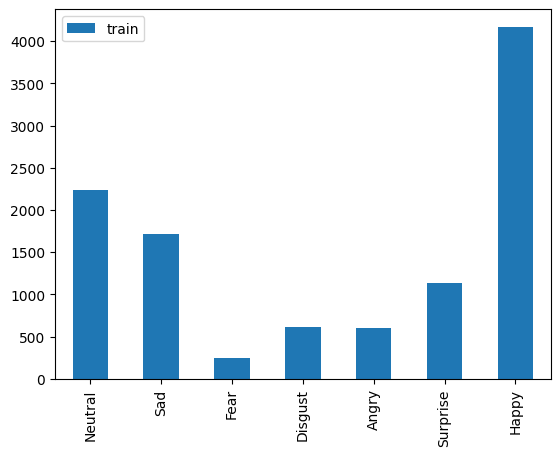

In [5]:
train_count.transpose().plot(kind='bar')

<Axes: >

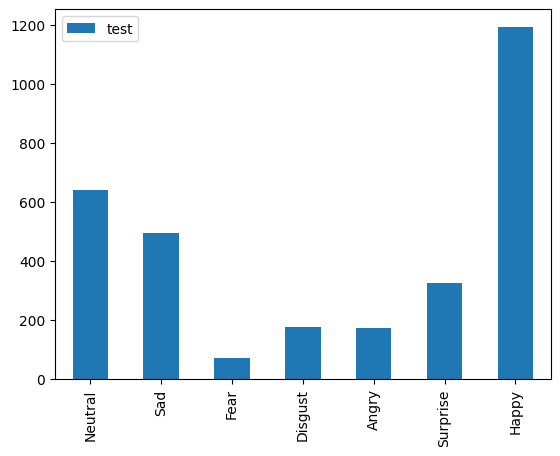

In [6]:
test_count.transpose().plot(kind='bar')

<Axes: >

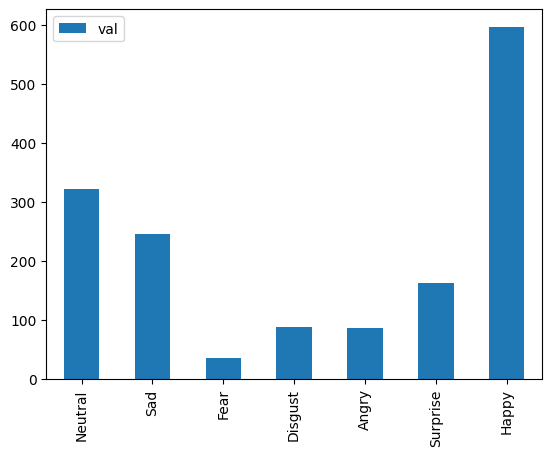

In [7]:
val_count.transpose().plot(kind='bar')

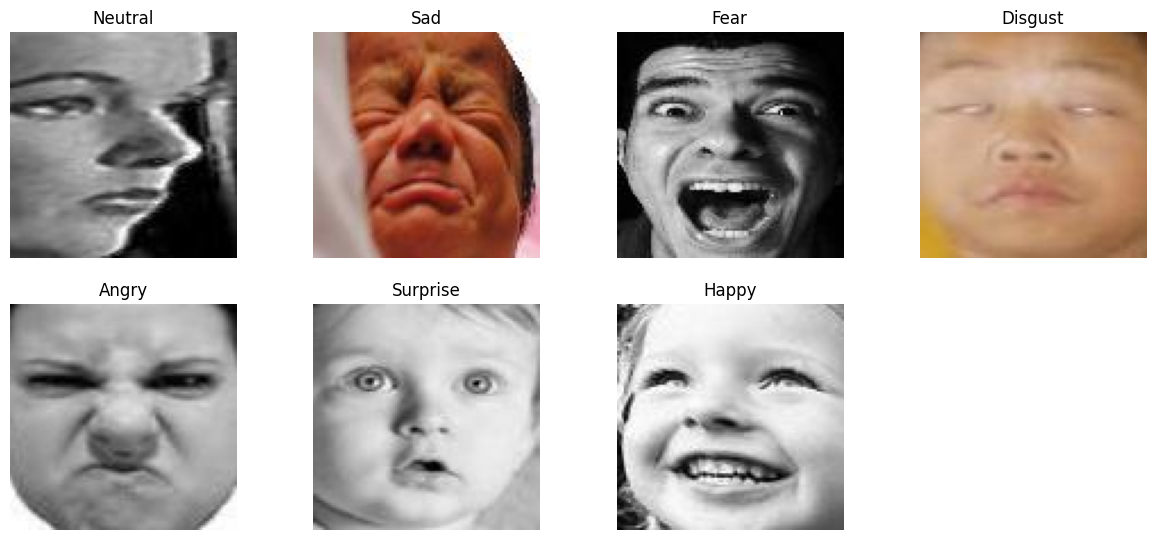

In [8]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[12])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.grid()
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [9]:
def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        # image = Image.open(image_path)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_name}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

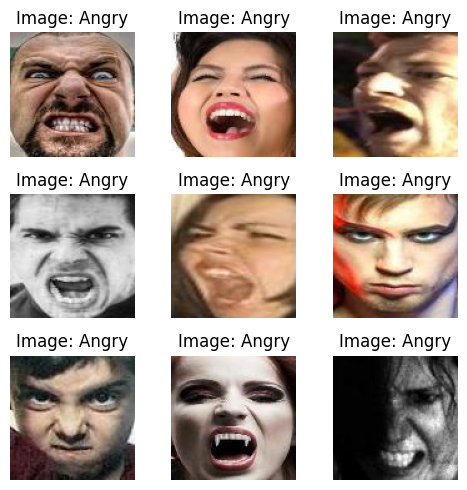

In [10]:
angry_directory_path = '/kaggle/working/train/Angry'
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

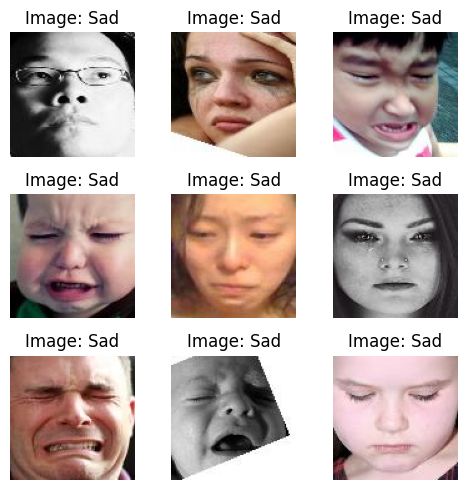

In [11]:
disgust_directory_path = '/kaggle/working/train/Sad'
plot_images_from_directory(disgust_directory_path, class_name = 'Sad')

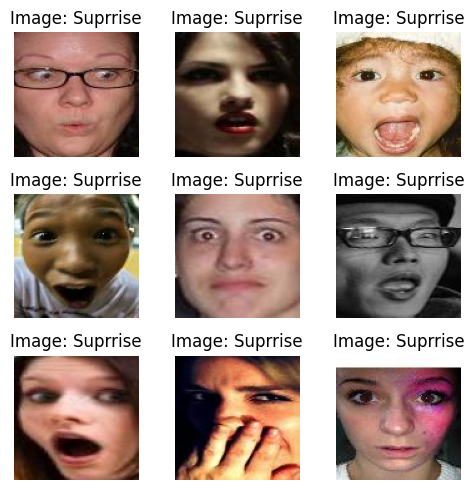

In [12]:
surpirse_directory_path = '/kaggle/working/train/Surprise'
plot_images_from_directory(surpirse_directory_path, class_name = 'Suprrise')

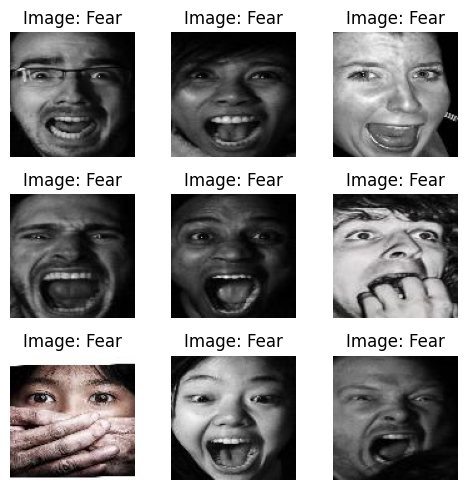

In [13]:
surpirse_directory_path = '/kaggle/working/train/Fear'
plot_images_from_directory(surpirse_directory_path, class_name = 'Fear')

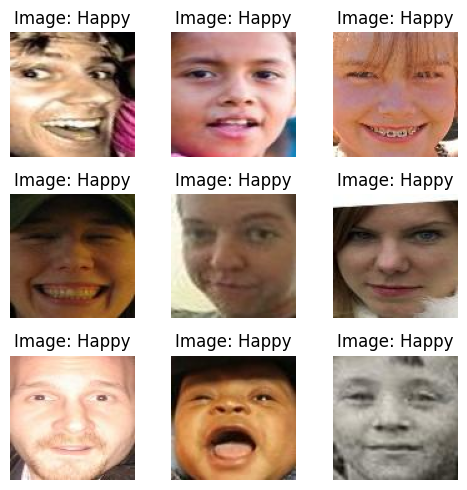

In [14]:
surpirse_directory_path = '/kaggle/working/train/Happy'
plot_images_from_directory(surpirse_directory_path, class_name = 'Happy')

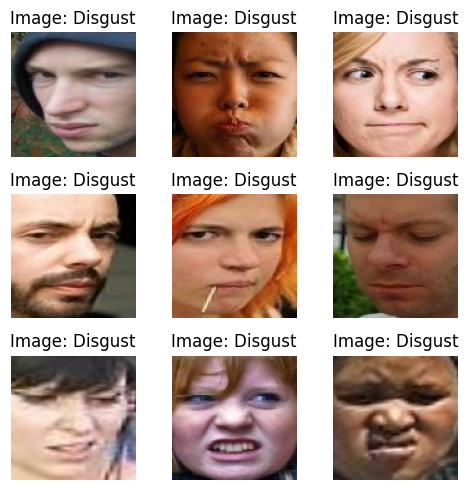

In [15]:
surpirse_directory_path = '/kaggle/working/train/Disgust'
plot_images_from_directory(surpirse_directory_path, class_name = 'Disgust')

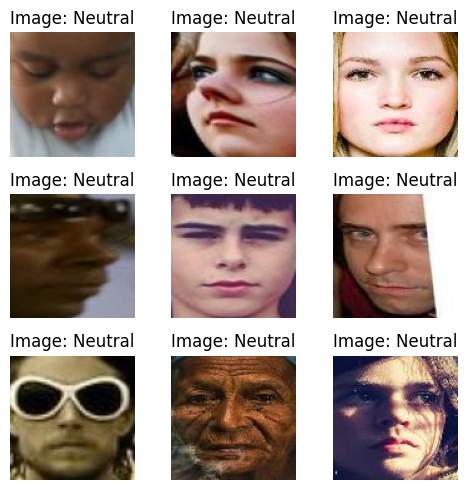

In [16]:
surpirse_directory_path = '/kaggle/working/train/Neutral'
plot_images_from_directory(surpirse_directory_path, class_name = 'Neutral')

In [17]:
train_data_dir = '/kaggle/working/train'
test_data_dir = '/kaggle/working/test'
val_data_dir = '/kaggle/working/val'

In [18]:
img_width, img_height = 100,100
batch_size = 32
num_classes = 7
color_mode = 'rgb'

In [20]:
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,          
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Non-augmented data generators for validation and test data
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_data_generator.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical'
)

# Test generator
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical'
)

Found 10733 images belonging to 7 classes.
Found 1535 images belonging to 7 classes.
Found 3071 images belonging to 7 classes.


In [22]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

# Accessing class labels for the test data
test_class_labels = test_generator.class_indices
print("Testing class labels:", test_class_labels)

Training class labels: {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}
Validation class labels: {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}
Testing class labels: {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [23]:
# Initialising the CNN
model = Sequential()

# Adding convolutional layers with activations on the same line for clarity
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer="glorot_uniform", padding='same', input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and adding dense layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

In [26]:
# Aggregating all callbacks into a list
callbacks = [earlystop]  #  # Adjusted as per your use-case

In [27]:
train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

In [28]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732686679.185761     132 service.cc:145] XLA service 0x786cb0001eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732686679.185817     132 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732686679.185822     132 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/336 ━━━━━━━━━━━━━━━━━━━━ 2:09:22 23s/step - accuracy: 0.1250 - loss: 16.5897

I0000 00:00:1732686698.041697     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


336/336 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.3579 - loss: 14.8232 - val_accuracy: 0.3792 - val_loss: 13.8804
Epoch 2/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 35s 102ms/step - accuracy: 0.4730 - loss: 10.8032 - val_accuracy: 0.5160 - val_loss: 9.7934
Epoch 3/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 36s 105ms/step - accuracy: 0.5167 - loss: 8.9153 - val_accuracy: 0.5583 - val_loss: 7.6794
Epoch 4/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.5354 - loss: 7.2490 - val_accuracy: 0.5876 - val_loss: 6.1214
Epoch 5/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 38s 111ms/step - accuracy: 0.5728 - loss: 5.7891 - val_accuracy: 0.6150 - val_loss: 4.8777
Epoch 6/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.6006 - loss: 4.6321 - val_accuracy: 0.6671 - val_loss: 3.7641
Epoch 7/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 37s 108ms/step - accuracy: 0.6291 - loss: 3.6896 - val_accuracy: 0.6410 - val_loss: 3.1872
Epoch 8/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.6416 - loss: 2.9969 - 

In [29]:
def plot_training_history(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

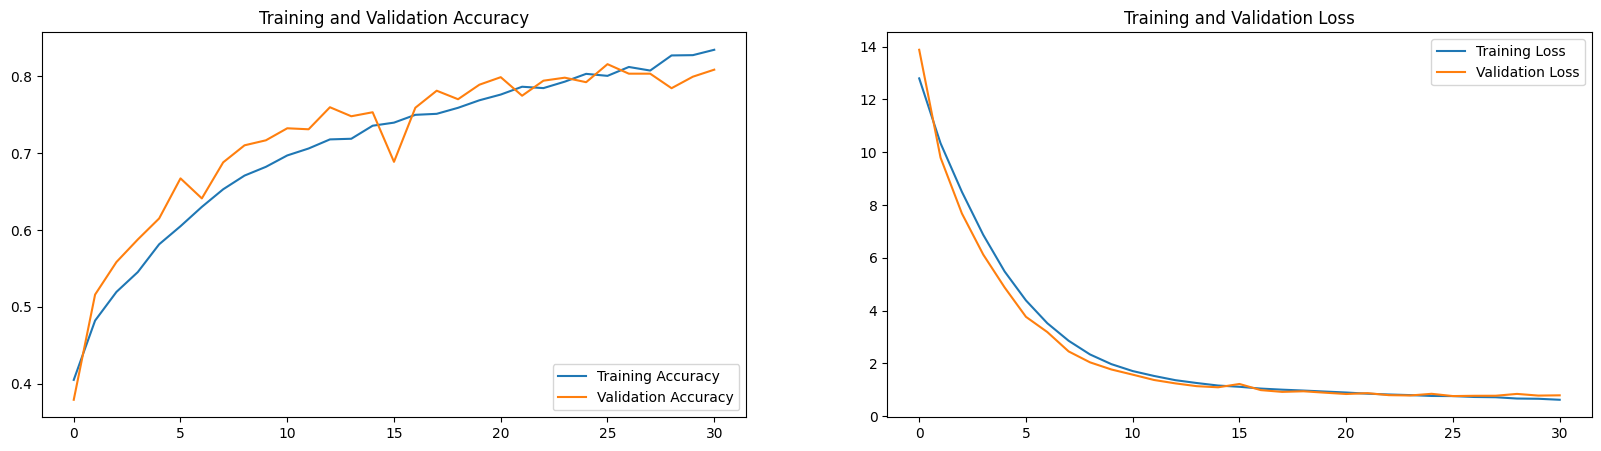

In [30]:
plot_training_history(history)

In [31]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , testing accuracy = {:.2f}".format(train_accu*100, test_accu*100))

336/336 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.8572 - loss: 0.6085
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8034 - loss: 0.7556
final train accuracy = 86.15 , testing accuracy = 80.04


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


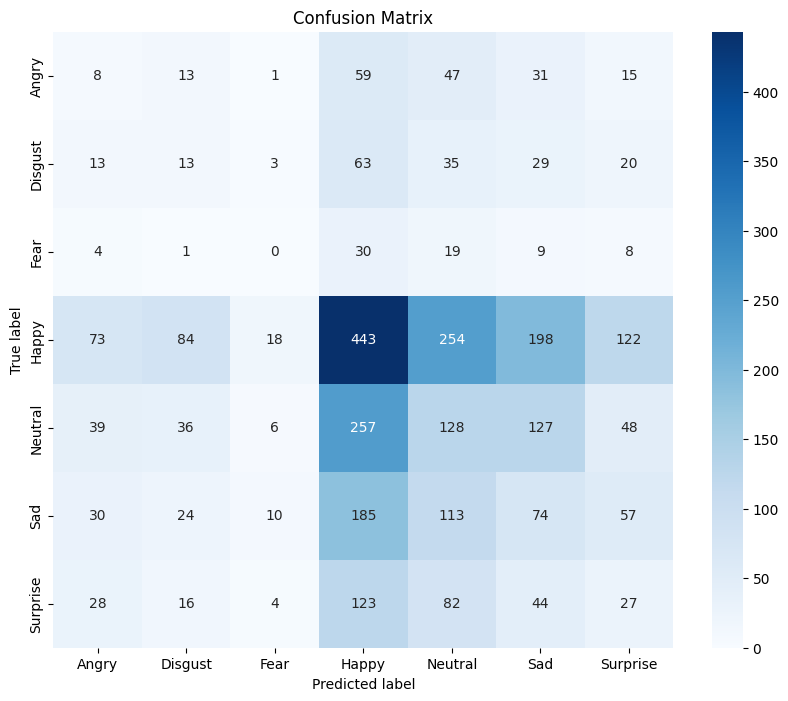

In [32]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=int(np.ceil(test_generator.samples/test_generator.batch_size))), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
# Printing the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       Angry       0.04      0.05      0.04       174
     Disgust       0.07      0.07      0.07       176
        Fear       0.00      0.00      0.00        71
       Happy       0.38      0.37      0.38      1192
     Neutral       0.19      0.20      0.19       641
         Sad       0.14      0.15      0.15       493
    Surprise       0.09      0.08      0.09       324

    accuracy                           0.23      3071
   macro avg       0.13      0.13      0.13      3071
weighted avg       0.23      0.23      0.23      3071



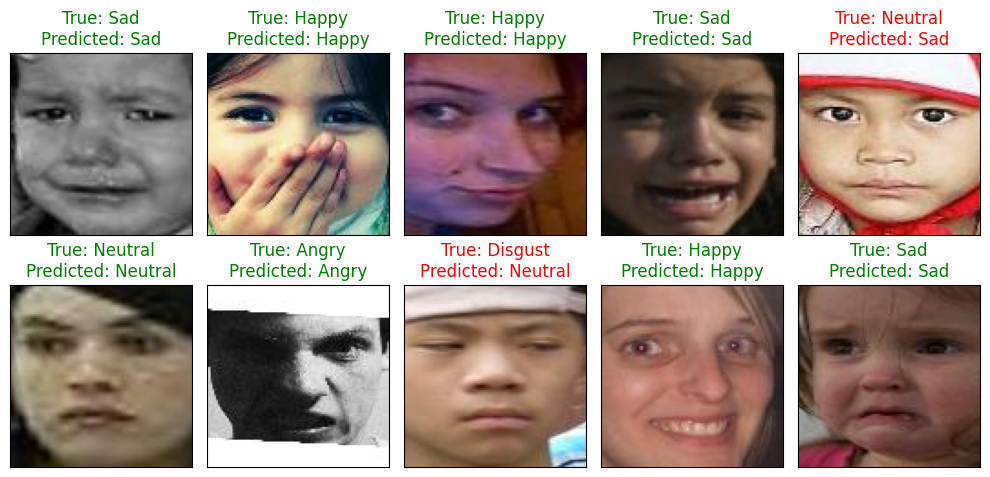

In [34]:
# Emotion classes for the dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Assuming test_generator and model are already defined
batch_size = test_generator.batch_size

# Selecting a random batch from the test generator
Random_batch = np.random.randint(0, len(test_generator) - 1)

# Selecting random image indices from the batch
Random_Img_Index = np.random.randint(0, batch_size, 10)

# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the model
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img)  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()